In [1]:
import seaborn as sns

# Titanic Dataset

In [2]:
data = sns.load_dataset('titanic')

In [3]:
data.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
652,0,3,male,21.0,0,0,8.4333,S,Third,man,True,NaN,Southampton,no,True
838,1,3,male,32.0,0,0,56.4958,S,Third,man,True,NaN,Southampton,yes,True
121,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
717,1,2,female,27.0,0,0,10.5000,S,Second,woman,False,E,Southampton,yes,True
317,0,2,male,54.0,0,0,14.0000,S,Second,man,True,NaN,Southampton,no,True


## Understanding the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
data_ = data.drop('deck',axis=1)

In [8]:
data_.duplicated().sum()

np.int64(111)

In [9]:
data_[data_.duplicated()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
47,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,Queenstown,yes,True
76,0,3,male,NaN,0,0,7.8958,S,Third,man,True,Southampton,no,True
77,0,3,male,NaN,0,0,8.0500,S,Third,man,True,Southampton,no,True
87,0,3,male,NaN,0,0,8.0500,S,Third,man,True,Southampton,no,True
95,0,3,male,NaN,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S,Third,man,True,Southampton,no,True
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,Southampton,no,True


In [10]:
data__ = data_.drop_duplicates()

In [11]:
data__.duplicated().sum()

np.int64(0)

In [12]:
data__[['survived','pclass','age','sibsp','parch','fare']].corr()['survived']

survived    1.000000
pclass     -0.336244
age        -0.084985
sibsp      -0.037597
parch       0.069669
fare        0.246669
Name: survived, dtype: float64

##  Univariate Analysis

### 1. Categorical Data

#### a. Count Plot

survived
0    458
1    322
Name: count, dtype: int64

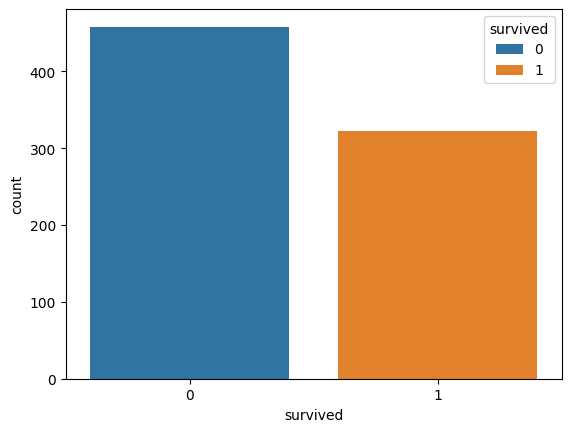

In [13]:
sns.countplot(data=data__,x='survived',hue='survived')
data__['survived'].value_counts()#.plot(kind='bar')

pclass
3    404
1    212
2    164
Name: count, dtype: int64

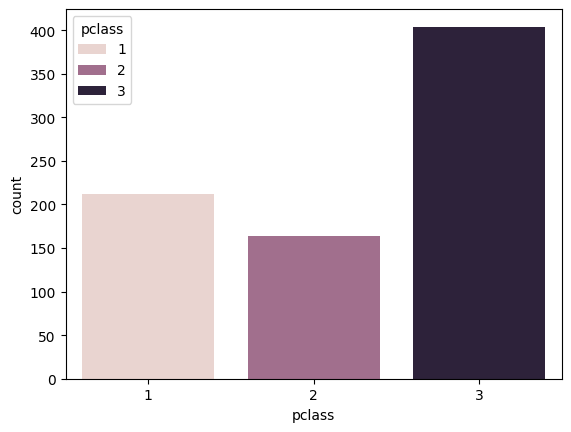

In [14]:
sns.countplot(data=data__,x='pclass',hue='pclass')
data__.value_counts('pclass')

sex
male      488
female    292
Name: count, dtype: int64

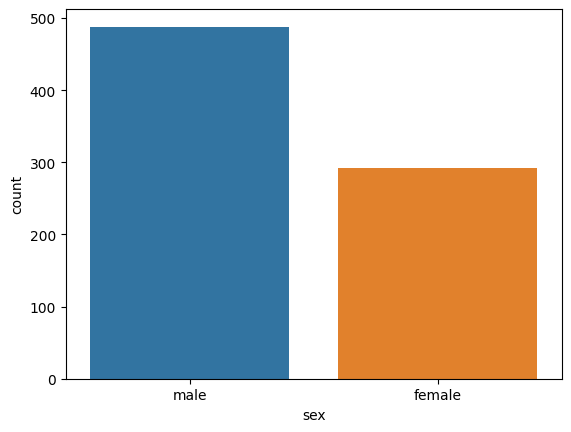

In [15]:
sns.countplot(data=data__,x='sex',hue='sex')
data__['sex'].value_counts()

embarked
S    565
C    155
Q     58
Name: count, dtype: int64

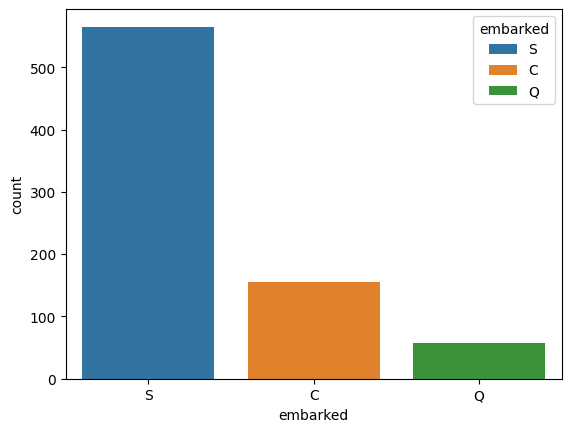

In [16]:
sns.countplot(data=data__,x='embarked',hue='embarked')
data__['embarked'].value_counts()

#### b. Pie Chart

<Axes: ylabel='count'>

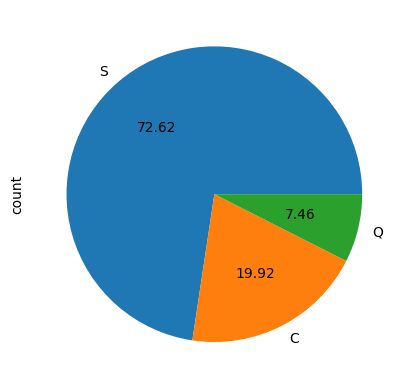

In [17]:
data__['embarked'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

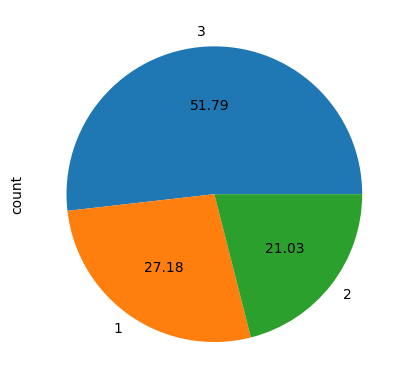

In [18]:
data__['pclass'].value_counts().plot(kind='pie',autopct='%.2f')

### 2. Numerical Data

#### a. Histogram and Displot

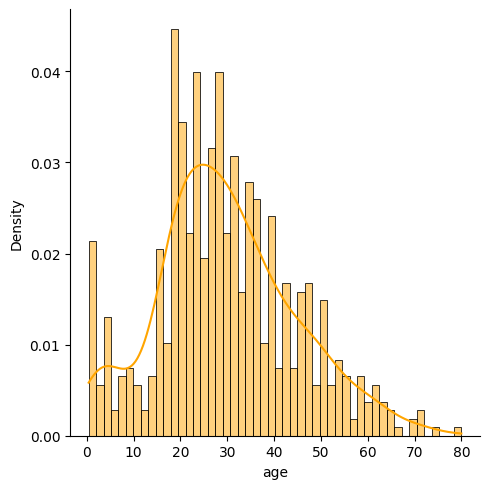

In [19]:
sns.displot(data=data__,x='age',kind='hist',bins=50,color='orange',stat='density',kde=True)

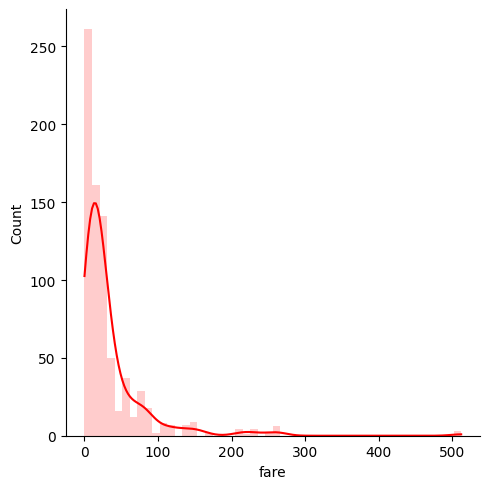

In [20]:
sns.displot(data=data__,x='fare',kind='hist',bins=50,kde=True,color='red',alpha=0.2,edgecolor='None')

#### Box Plot

<Axes: xlabel='age'>

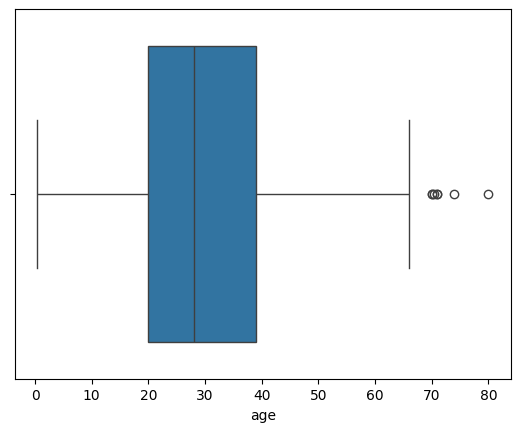

In [21]:
sns.boxplot(data=data__,x='age')

<Axes: xlabel='fare'>

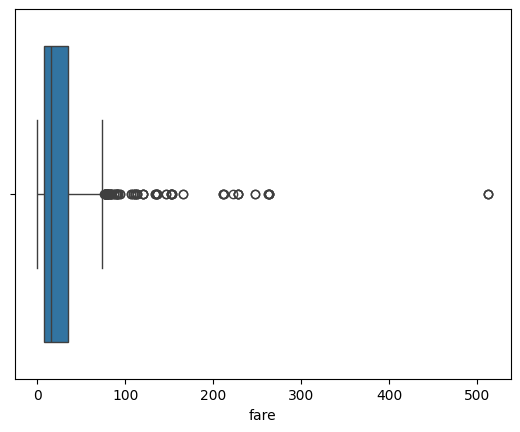

In [22]:
sns.boxplot(data=data__,x='fare')

In [23]:
data__['parch'].min()

np.int64(0)

In [24]:
data__['parch'].max()

np.int64(6)

In [25]:
data__['parch'].mean()

np.float64(0.41794871794871796)

In [26]:
data__['parch'].skew()

np.float64(2.624282339282019)

# Iris Dataset

In [27]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [28]:
df = sns.load_dataset('iris')

In [29]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
49,5.0,3.3,1.4,0.2,setosa
56,6.3,3.3,4.7,1.6,versicolor
2,4.7,3.2,1.3,0.2,setosa
109,7.2,3.6,6.1,2.5,virginica
96,5.7,2.9,4.2,1.3,versicolor
9,4.9,3.1,1.5,0.1,setosa
125,7.2,3.2,6.0,1.8,virginica
31,5.4,3.4,1.5,0.4,setosa
20,5.4,3.4,1.7,0.2,setosa
73,6.1,2.8,4.7,1.2,versicolor


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [31]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [32]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: xlabel='species', ylabel='count'>

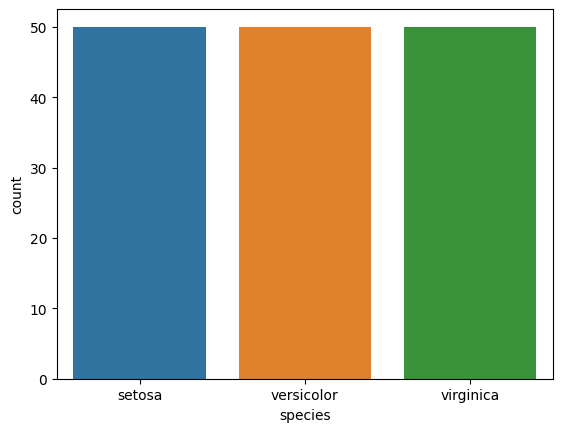

In [33]:
sns.countplot(df,x='species',hue='species')

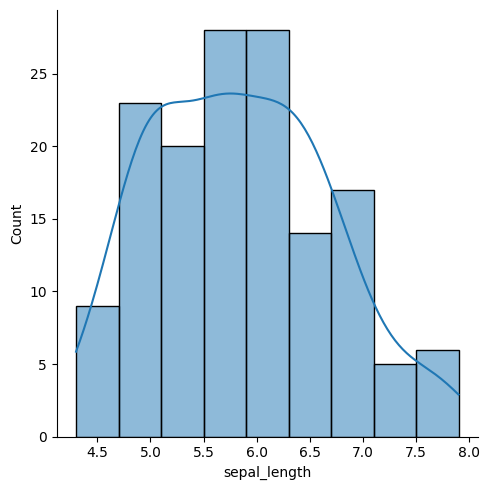

In [35]:
sns.displot(df,x='sepal_length',kind='hist',kde=True)

<Axes: xlabel='sepal_length'>

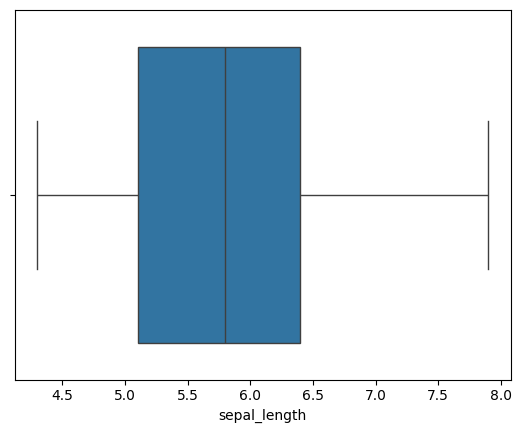

In [39]:
sns.boxplot(df,x='sepal_length')

<Axes: xlabel='sepal_width'>

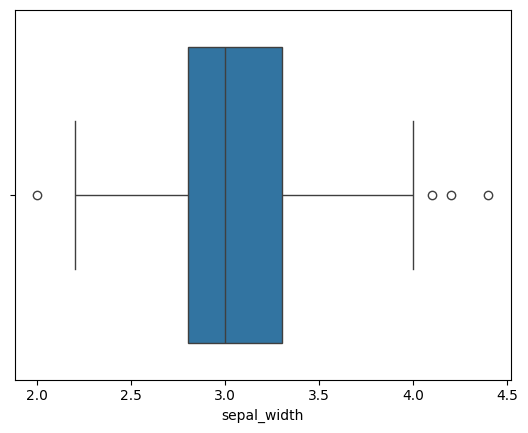

In [40]:
sns.boxplot(df,x='sepal_width')

<Axes: xlabel='petal_length'>

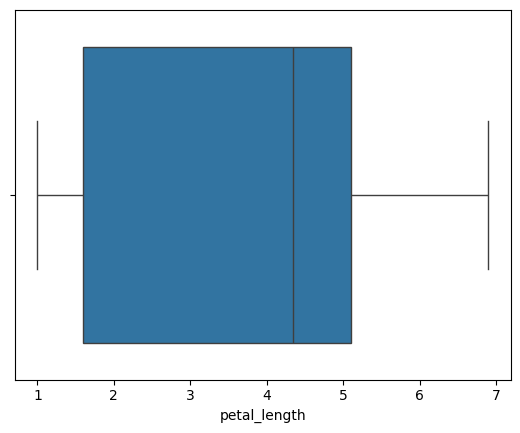

In [42]:
sns.boxplot(df,x='petal_length')

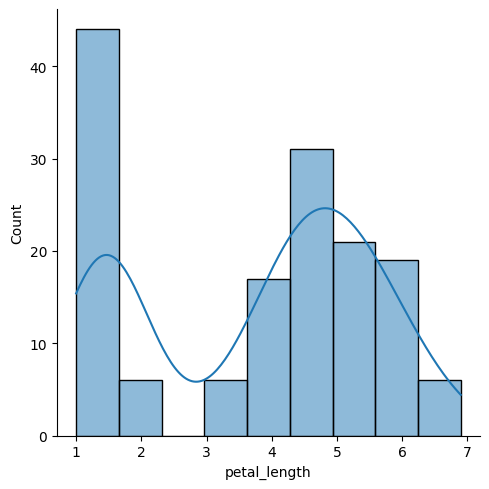

In [45]:
sns.displot(df,x='petal_length',kind='hist',kde=True)